In [ ]:
# @title Pre-processing tools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
# @title Importing the Dataset

dataset = pd.read_csv("weather.csv", na_values='-')
selected_columns_indices = [0,1,2,3,4,5,6,7,8,12,13,14,15,16,17,18,19,20,21]
date_column_index = 0

precipitation_column_index = 21
target_column_index = 10
# dataset.iloc[:, precipitation_column_index] = pd.to_numeric(dataset.iloc[:, precipitation_column_index].replace(['T', '-'], 0.005, errors='coerce'), errors='coerce')

dataset.iloc[:, date_column_index] = pd.to_datetime(dataset.iloc[:, date_column_index])
dataset['Day'] = dataset.iloc[:, date_column_index].dt.day
dataset['Month'] = dataset.iloc[:, date_column_index].dt.month
dataset['Year'] = dataset.iloc[:, date_column_index].dt.year

dataset.drop(columns=[dataset.columns[date_column_index]], inplace=True)

dataset['Day'] = dataset['Day'].astype(float)
dataset['Month'] = dataset['Month'].astype(float)
dataset['Year'] = dataset['Year'].astype(float)

dataset.insert(0, 'Year', dataset.pop('Year'))
dataset.insert(1, 'Month', dataset.pop('Month'))
dataset.insert(2, 'Day', dataset.pop('Day'))

dataset.iloc[:, precipitation_column_index] = dataset.iloc[:, precipitation_column_index].replace('T', 0.005).astype(float)
dataset.iloc[:, selected_columns_indices] = dataset.iloc[:, selected_columns_indices].replace('-', np.nan).astype(float)

x = dataset.iloc[:, selected_columns_indices].values
y = dataset.iloc[:, target_column_index].values



<ipython-input-2-770aff81f90b>:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataset.iloc[:, date_column_index] = pd.to_datetime(dataset.iloc[:, date_column_index])
<ipython-input-2-770aff81f90b>:26: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataset.iloc[:, precipitation_column_index] = dataset.iloc[:, precipitation_column_index].replace('T', 0.005).astype(float)
<ipython-input-2-770aff81f90b>:27: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new

In [ ]:
print(dataset)

        Year  Month   Day  TempHighF  TempAvgF  TempLowF  DewPointHighF  \
0     2013.0   12.0  21.0       74.0      60.0      45.0           67.0   
1     2013.0   12.0  22.0       56.0      48.0      39.0           43.0   
2     2013.0   12.0  23.0       58.0      45.0      32.0           31.0   
3     2013.0   12.0  24.0       61.0      46.0      31.0           36.0   
4     2013.0   12.0  25.0       58.0      50.0      41.0           44.0   
...      ...    ...   ...        ...       ...       ...            ...   
1314  2017.0    7.0  27.0      103.0      89.0      75.0           71.0   
1315  2017.0    7.0  28.0      105.0      91.0      76.0           71.0   
1316  2017.0    7.0  29.0      107.0      92.0      77.0           72.0   
1317  2017.0    7.0  30.0      106.0      93.0      79.0           70.0   
1318  2017.0    7.0  31.0       99.0      88.0      77.0           66.0   

      DewPointAvgF  DewPointLowF  HumidityHighPercent  ...  \
0             49.0          43.0     

In [ ]:
print(x)

[[2.013e+03 1.200e+01 2.100e+01 ... 2.000e+00 3.100e+01 4.600e-01]
 [2.013e+03 1.200e+01 2.200e+01 ... 5.000e+00 2.500e+01 0.000e+00]
 [2.013e+03 1.200e+01 2.300e+01 ... 1.000e+01 1.200e+01 0.000e+00]
 ...
 [2.017e+03 7.000e+00 2.900e+01 ... 1.000e+01 1.700e+01 0.000e+00]
 [2.017e+03 7.000e+00 3.000e+01 ... 1.000e+01 2.000e+01 0.000e+00]
 [2.017e+03 7.000e+00 3.100e+01 ... 1.000e+01 2.000e+01 0.000e+00]]


In [ ]:
print(y)

['4' '6' '3' ... '4' '4' '4']


In [ ]:
# @title Taking Care of Missing Data
from sklearn.impute import SimpleImputer

imputer_x = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer_y = SimpleImputer(missing_values=np.nan, strategy='mean')
min_index, max_index = 3, 20
imputer_x.fit(x[:, min_index:max_index])
x[:, min_index:max_index] = imputer_x.transform(x[:, min_index:max_index])
y = y.reshape(-1,1)
imputer_y.fit(y)
y = imputer_y.transform(y).flatten()

In [ ]:
print(x)

[[2.013e+03 1.200e+01 2.100e+01 ... 2.000e+00 3.100e+01 4.600e-01]
 [2.013e+03 1.200e+01 2.200e+01 ... 5.000e+00 2.500e+01 0.000e+00]
 [2.013e+03 1.200e+01 2.300e+01 ... 1.000e+01 1.200e+01 0.000e+00]
 ...
 [2.017e+03 7.000e+00 2.900e+01 ... 1.000e+01 1.700e+01 0.000e+00]
 [2.017e+03 7.000e+00 3.000e+01 ... 1.000e+01 2.000e+01 0.000e+00]
 [2.017e+03 7.000e+00 3.100e+01 ... 1.000e+01 2.000e+01 0.000e+00]]


In [ ]:
# @title Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
print(x_train)

[[2.015e+03 1.200e+01 1.000e+00 ... 1.000e+01 1.200e+01 0.000e+00]
 [2.017e+03 6.000e+00 1.000e+00 ... 9.000e+00 1.600e+01 0.000e+00]
 [2.015e+03 3.000e+00 1.000e+00 ... 2.000e+00 1.600e+01 9.000e-02]
 ...
 [2.016e+03 1.200e+01 2.100e+01 ... 1.000e+01 1.900e+01 0.000e+00]
 [2.014e+03 8.000e+00 1.300e+01 ... 1.000e+01 2.000e+01 0.000e+00]
 [2.016e+03 1.100e+01 1.600e+01 ... 1.000e+01 1.800e+01 0.000e+00]]


In [ ]:
print(x_test)

[[2.014e+03 1.000e+01 5.000e+00 ... 1.000e+01 2.300e+01 0.000e+00]
 [2.014e+03 6.000e+00 2.900e+01 ... 7.000e+00 2.700e+01 0.000e+00]
 [2.016e+03 4.000e+00 2.100e+01 ... 2.000e+00 2.500e+01 4.100e-01]
 ...
 [2.016e+03 1.000e+00 6.000e+00 ... 1.000e+00 1.300e+01 1.300e-01]
 [2.015e+03 9.000e+00 1.300e+01 ... 1.000e+01 2.000e+01 0.000e+00]
 [2.015e+03 4.000e+00 1.300e+01 ... 2.000e+00 1.900e+01 9.000e-02]]


In [ ]:
print(y_train)

['2' '4' '6' ... '4' '4' '3']


In [ ]:
print(y_test)

['6' '9' '5' '-' '5' '4' '8' '4' '2' '2' '5' '5' '7' '4' '2' '10' '6' '8'
 '4' '6' '3' '6' '3' '10' '3' '4' '4' '2' '3' '5' '2' '3' '5' '8' '5' '2'
 '7' '3' '2' '7' '4' '6' '2' '6' '6' '5' '5' '4' '6' '6' '2' '7' '3' '4'
 '5' '6' '3' '2' '4' '1' '4' '7' '8' '4' '7' '3' '6' '5' '4' '6' '4' '4'
 '5' '7' '5' '5' '2' '3' '5' '2' '4' '10' '3' '6' '1' '6' '6' '5' '4' '2'
 '4' '5' '5' '5' '5' '4' '6' '8' '4' '8' '7' '7' '6' '5' '11' '7' '8' '4'
 '5' '4' '4' '2' '5' '5' '3' '3' '2' '7' '3' '8' '7' '6' '7' '5' '4' '7'
 '4' '6' '3' '3' '5' '2' '4' '3' '8' '4' '4' '2' '10' '5' '8' '8' '4' '1'
 '2' '9' '4' '3' '4' '7' '6' '7' '3' '3' '7' '3' '5' '8' '8' '2' '2' '3'
 '5' '6' '3' '5' '7' '6' '3' '3' '6' '6' '6' '7' '5' '4' '4' '5' '5' '5'
 '5' '5' '4' '7' '6' '6' '8' '3' '7' '5' '7' '3' '6' '4' '2' '8' '5' '9'
 '5' '2' '4' '5' '5' '4' '3' '5' '6' '7' '2' '3' '5' '5' '4' '8' '2' '8'
 '5' '5' '4' '5' '7' '6' '8' '4' '1' '8' '4' '5' '6' '2' '1' '6' '4' '4'
 '2' '6' '8' '5' '5' '1' '6' '2' '8' '7' '5' '

In [ ]:
# # @title Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x_train[:, 1:18] = sc.fit_transform(x_train[:, 1:18])
# x_test[:, 1:18] = sc.transform(x_test[:, 1:18])


In [ ]:
# print(x_train)

[['2015-12-01' -1.4791234489202882 -1.258650578507546 ...
  0.857818672888404 -1.63669958268703 -0.2573448816325481]
 ['2017-06-01' 0.5451893227794058 0.5165851973286324 ...
  0.5840146680815227 -0.943455685845184 -0.2573448816325481]
 ['2015-03-01' -2.558756927160125 -2.2527826129758055 ...
  -1.3326133655666454 -0.943455685845184 -0.050295807269030955]
 ...
 ['2016-12-21' -0.6693983402404106 -0.9746128543737573 ...
  0.857818672888404 -0.4235227632137995 -0.2573448816325481]
 ['2014-08-13' 1.0850060618993242 0.871632352495868 ... 0.857818672888404
  -0.25021178900333796 -0.2573448816325481]
 ['2016-11-16' 0.3427580456094364 0.019519180094502462 ...
  0.857818672888404 -0.596833737424261 -0.2573448816325481]]


In [ ]:
# print(x_test)

[['2014-10-05' 0.41023513799942624 0.30355690422829096 ...
  0.857818672888404 0.2697211336280466 -0.2573448816325481]
 ['2014-06-29' 0.9500518771193446 1.0846606455962093 ...
  0.03640665846776037 0.9629650304698927 -0.2573448816325481]
 ['2016-04-21' 0.14032676843946704 0.09052861112794959 ...
  -1.3326133655666454 0.6163430820489696 0.6858786793568078]
 ...
 ['2016-01-06' -1.883986003260227 -1.4716788716078872 ...
  -1.6064173703735267 -1.4633886084765686 0.04172600355919891]
 ['2015-09-13' 0.6801435075593855 0.44557576629518525 ...
  0.857818672888404 -0.25021178900333796 -0.2573448816325481]
 ['2015-04-13' 0.41023513799942624 0.3745663352617381 ...
  -1.3326133655666454 -0.4235227632137995 -0.050295807269030955]]


In [ ]:
# @title Training The DecisionTreeRegression Model
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# @title Predicting a new result
y_pred = regressor.predict(x_test)

In [ ]:
print(y_pred)

[ 6.  8.  3.  5.  6.  3.  7.  3.  2.  4.  6.  3.  7.  4.  2.  5.  4.  9.
  2.  8.  3.  3.  5.  9.  3.  2.  3.  2.  3.  5.  3.  3.  6.  6.  4.  3.
  7.  3.  2.  6.  4.  7.  2.  5.  6.  4.  2.  3.  5.  3.  3.  8.  6.  6.
  3.  7.  3.  3.  3.  6.  3.  4.  8.  5. 10.  3.  5.  8.  2.  9.  4.  4.
  6.  6.  4.  5.  3.  3.  4.  3.  4.  4.  3.  4.  1.  7.  4.  5.  3.  3.
  4.  4.  6.  5.  3.  3.  2.  9.  3. 10.  6.  9.  3.  4. 10.  3.  9.  4.
  6.  3.  3.  2.  5.  7.  3.  6.  2.  9.  4.  8.  8.  7.  5.  3.  3.  6.
  5.  4.  7.  6.  8.  4.  3.  7.  9.  2.  5.  3.  7.  4.  9.  5.  3.  3.
  2.  5.  6.  4.  3.  3.  6.  6.  3.  4.  6.  4.  3.  7.  5.  3.  2.  2.
  6.  5.  2.  4.  9.  6.  5.  2.  9.  6.  6.  3.  6.  3.  7.  4.  4.  4.
  4.  8.  3.  6.  6.  5.  7.  4.  9.  5.  9.  3.  4.  5.  5.  4.  7. 10.
  7.  3.  3.  2.  6.  5.  1.  5.  1.  5.  1.  4.  4.  5.  2.  9.  3.  7.
  2.  3.  4.  7.  7.  7.  6.  1.  3.  9.  3.  3.  6.  2.  2.  6.  7.  2.
  1.  7.  6.  6.  5.  2.  6.  4.  8.  7.  4.  4.  4

In [ ]:
# @title Evaluating the performance of the model
# using the mean absolute error
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 5.132575757575758


In [ ]:
#using the mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 59.15530303030303


In [ ]:
#using the root mean squared error

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 7.6912484701966966


In [ ]:
#using the R2 score
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

R2 Score: 0.602303442324571


In [ ]:
# feature importance
feature_importance = regressor.feature_importances_
print(feature_importance)

[0.00686452 0.0054105  0.01132446 0.12400972 0.05159044 0.01525086
 0.02775257 0.14945286 0.11676688 0.00582152 0.00335751 0.00512349
 0.         0.08856104 0.34544084 0.00675304 0.00409912 0.01040544
 0.02201519]


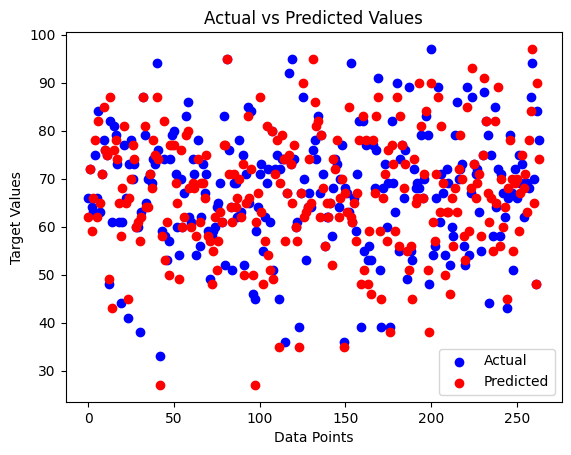

In [ ]:
# @title Visualizing the Decision Tree Regression results
plt.scatter(np.arange(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(np.arange(len(y_test)), y_pred, color='red', label='Predicted')

plt.title('Actual vs Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Target Values')
plt.legend()
plt.show()